Question 01

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3840 - val_loss: 0.1888
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1796 - val_loss: 0.1528
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1480 - val_loss: 0.1330
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1309 - val_loss: 0.1204
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1194 - val_loss: 0.1124
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1121 - val_loss: 0.1069
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1071 - val_loss: 0.1030
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1034 - val_loss: 0.0999
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1002 - val_loss: 0.0975
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0982 - val_loss: 0.0958
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


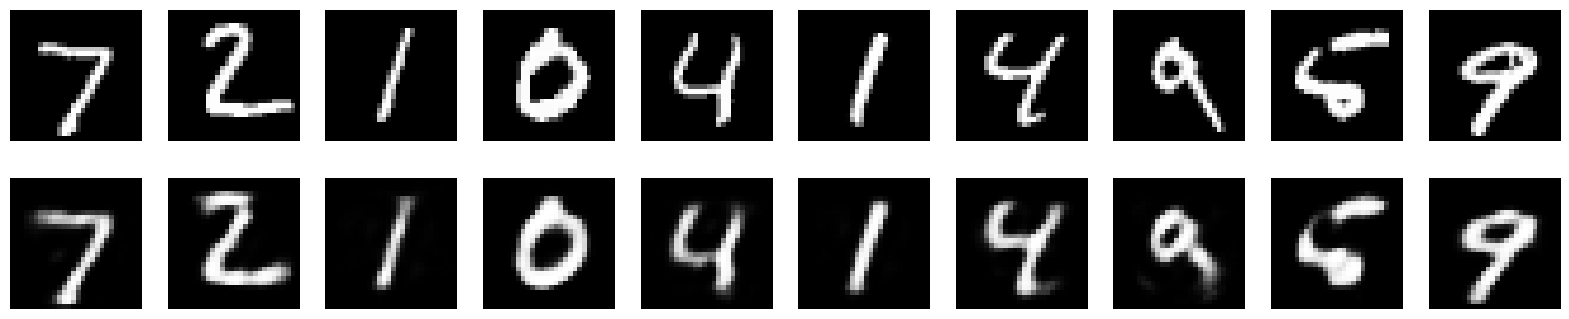

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load and preprocess
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Model
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Plot results
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Question 02

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3694 - val_loss: 0.2271
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2142 - val_loss: 0.1832
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1792 - val_loss: 0.1640
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1616 - val_loss: 0.1496
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1488 - val_loss: 0.1426
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1425 - val_loss: 0.1377
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1378 - val_loss: 0.1343
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1344 - val_loss: 0.1321
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1328 - val_loss: 0.1308
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1316 - val_loss: 0.1290
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


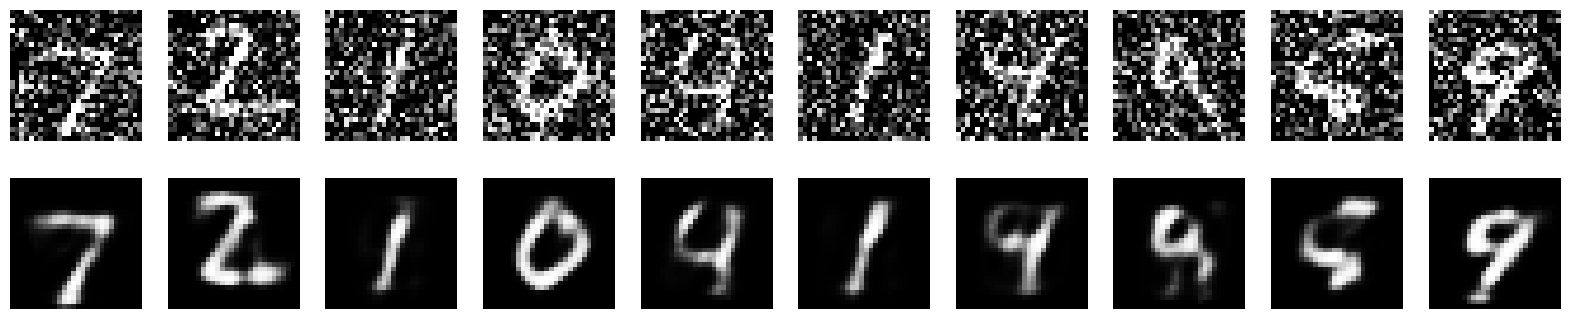

In [2]:
# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Model (same structure as Q1)
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train with noisy input but clean output
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Plot noisy vs reconstructed
decoded_imgs = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Denoised
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Question 03

In [3]:
import tensorflow as tf
import numpy as np

# Load Shakespeare dataset
path = tf.keras.utils.get_file("shakespeare.txt", "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")
text = open(path, 'rb').read().decode(encoding='utf-8').lower()

# Character mapping
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Prepare training sequences
seq_length = 100
examples_per_epoch = len(text) // (seq_length + 1)
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

# Properly indented function
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Build the model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 512

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units, return_sequences=True),
    tf.keras.layers.Dense(vocab_size)
])


# Compile
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

# Train
model.fit(dataset, epochs=5)

# Text generator function
def generate_text(model, start_string, temperature=1.0):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for _ in range(300):
        predictions = model(input_eval)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Generate sample text
print(generate_text(model, start_string="once upon a time, "))


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - loss: 2.8297
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - loss: 1.9755
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 195s 973ms/step - loss: 1.7252
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - loss: 1.5871
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - loss: 1.4971
once upon a time, andrirmiby in orery he towalase he ponores fe ithelkethe, anong
whon?
'dollindreamyotesote; oulis, mearieday t y! whoume,
way inimitr mbe cunsay is!' the qesoun ayoterour-sopy edoupouref at.
thor ivou share ho fo bod t houpth serd adved micecun thes

he


t h
a-ha ormello tes d ains:
ho?
a-$$&vero?



Question 04

In [4]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix

# Load IMDB dataset
num_words = 10000  # only top 10k words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding sequences to make them same length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate on test set
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.6393 - loss: 0.6065 - val_accuracy: 0.8360 - val_loss: 0.3745
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.8878 - loss: 0.2816 - val_accuracy: 0.8744 - val_loss: 0.3032
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.9342 - loss: 0.1832 - val_accuracy: 0.8572 - val_loss: 0.3557
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.9497 - loss: 0.1438 - val_accuracy: 0.8582 - val_loss: 0.3385
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.9590 - loss: 0.1209 - val_accuracy: 0.8696 - val_loss: 0.4129
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step
Confusion Matrix:
[[11378  1122]
 [ 2617  9883]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     12500
           1       0.90      0.79      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.86   